# Solar Model
A notebook to analyze the solar data and produce a predictive model for install time

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
%matplotlib inline

In [3]:
plt.style.use('seaborn-darkgrid')

Read in data

In [4]:
solar_data = pd.read_excel("solar_data.xlsx")

Select necessary columns

In [5]:
solar_data_selected_columns = solar_data[
    [
        "Number Panels",
        "BrightBox",
        "Service Panel Upgrade",
        "Miles to Installtion",
        "Standard Install Hours",
        "Additional SOW Hours"
    ]
].dropna(axis = 0, subset = ["Number Panels"])

In [6]:
len(solar_data_selected_columns)

1980

Format data

In [7]:
def num_panels_category(num_panels):
    if (num_panels < 14):
        return "small"
    elif (num_panels >= 14 and num_panels <= 24):
        return "medium"
    else:
        return "large"

In [8]:
solar_data_selected_columns["num_panels_category"] = solar_data_selected_columns["Number Panels"].map(num_panels_category)
solar_data_selected_columns["log_miles_to_install"] = solar_data_selected_columns["Miles to Installtion"].map(np.log10)
solar_data_selected_columns["ttl_hours"] = solar_data_selected_columns["Standard Install Hours"] +\
    solar_data_selected_columns["Additional SOW Hours"]
solar_data_selected_columns["service_panel_upgrade"] = solar_data_selected_columns["Service Panel Upgrade"].map(
    lambda x: 1 if x == 1 else 0)

Take a look at the first few rows

In [9]:
solar_data_selected_columns.head()

,Number Panels,BrightBox,Service Panel Upgrade,Miles to Installtion,Standard Install Hours,Additional SOW Hours,num_panels_category,log_miles_to_install,ttl_hours,service_panel_upgrade
0,25.0,0.0,NaN,23.443563,81.0,0.0,large,1.370024,81.0,0
1,27.0,0.0,NaN,30.577530,52.5,0.0,large,1.485402,52.5,0
2,22.0,0.0,NaN,29.683728,65.5,0.0,medium,1.472518,65.5,0
3,41.0,0.0,1.0,13.577014,227.5,17.5,large,1.132804,245.0,1
4,23.0,0.0,NaN,40.536463,72.0,0.0,medium,1.607846,72.0,0


Plot variables

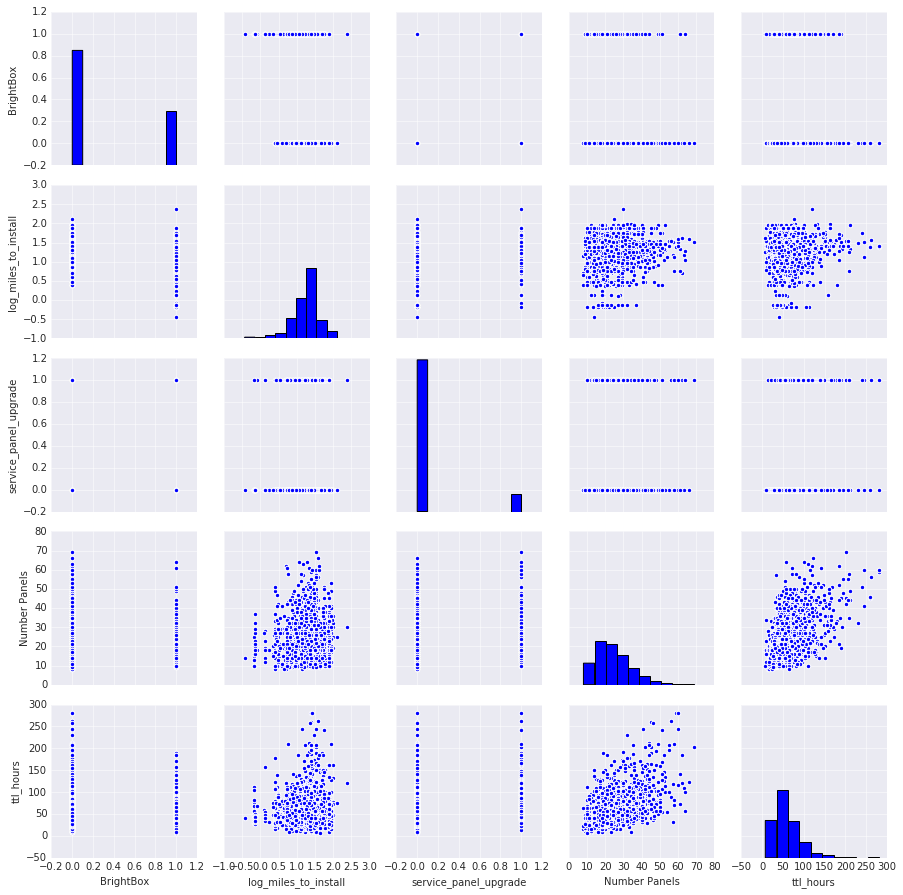

In [10]:
sns.pairplot(
    data = solar_data_selected_columns,
    # hue = "num_panels_category",
    vars = ["BrightBox", "log_miles_to_install", "service_panel_upgrade", "Number Panels", "ttl_hours"])

Apply linear model

In [12]:
X = solar_data_selected_columns[["BrightBox", "Miles to Installtion", "service_panel_upgrade", "Number Panels"]]
y = solar_data_selected_columns["ttl_hours"]

In [68]:
def getRSquared():
    
    model = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    return [r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)]

In [69]:
r_squared = [getRSquared() for i in range(100)] 

In [70]:
r_squared_diff = [i[0] - i[1] for i in r_squared]

In [71]:
print("avg r-squared train/test difference for 100 train-test splits = {}".format(np.mean(r_squared_diff)))

avg r-squared train/test difference for 100 train-test splits = 0.018431599316684647


In [72]:
print("avg r-squared on test set for 100 train-test splits = {}".format(np.mean([i[1] for i in r_squared])))

avg r-squared on test set for 100 train-test splits = 0.3432249560003555


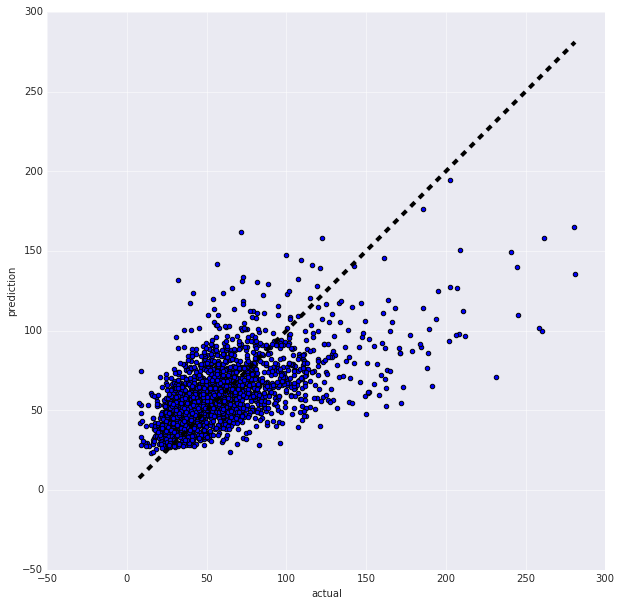

In [74]:
model = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model.fit(X, y)
y_pred = model.predict(X)

fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel("actual")
ax.set_ylabel("prediction")

In [75]:
r2_score(y, y_pred)

0.36085449882926324

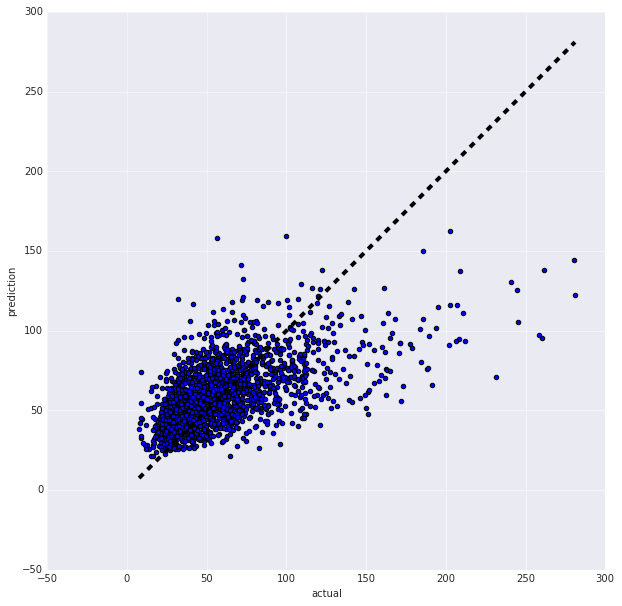

In [76]:
model = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
model.fit(X, y)
y_pred = model.predict(X)

fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel("actual")
ax.set_ylabel("prediction")

In [77]:
r2_score(y, y_pred)

0.34178422298018274